<img src='https://www.anadronestarting.com/wp-content/uploads/intel-main_opt.png' width=50%>

# 모바일넷을 이용한 이미지분류
<font size=5><b>(Image Classification using Mobilenet)<b></font>

<div align='right'>성  민  석<br>(Minsuk Sung)</div>

<img src='https://gitcdn.xyz/cdn/Tony607/blog_statics/9ddd48eb623175fb734e63865ebe604351c64c61/images/openvino/openvino.png' width=50%>

---

<h1>강의목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Keras-h5-파일을-Tensorflow-pb파일로-변환" data-toc-modified-id="Keras-h5-파일을-Tensorflow-pb파일로-변환-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Keras h5 파일을 Tensorflow pb파일로 변환</a></span></li><li><span><a href="#Tensorflow-pb파일을-OpenVINO-xml,-bin파일로-변환" data-toc-modified-id="Tensorflow-pb파일을-OpenVINO-xml,-bin파일로-변환-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tensorflow pb파일을 OpenVINO xml, bin파일로 변환</a></span></li><li><span><a href="#OpenVINO에서-xml,bin파일로-추론" data-toc-modified-id="OpenVINO에서-xml,bin파일로-추론-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OpenVINO에서 xml,bin파일로 추론</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

<img src='https://gitcdn.xyz/cdn/Tony607/blog_statics/73e93019d8a9dafd0b5a0fe200e982b75d50bf21/images/keras-tf/keras_tf_pb.png' width=50%>

## Keras h5 파일을 Tensorflow pb파일로 변환

In [1]:
%run ./utils/keras_to_freeze_binary.py ./bin/mobilenetv2_class20.h5 ./bin/mobilenetv2

Using TensorFlow backend.
/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/intel/imobilenet/myvenv/lib/p


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/intel/imobilenet/myvenv/lib/python

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1300      
Total params: 2,947,988
Trainable params: 2,216,084
Non-trainable params: 731,904
_________________________________________________________________
Input name:
mobilenetv2_1.00_224_input_1:0
Output name:
dense_2_1/Softmax:0
Instructions for updating:
Use

<img src='https://software.intel.com/sites/default/files/managed/b7/e3/webops12032-diagram-of-flow-750.jpg'>

## Tensorflow pb파일을 OpenVINO xml, bin파일로 변환

In [2]:
%run /opt/intel/openvino/deployment_tools/model_optimizer/mo.py \
    --framework tf \
    --input_model ./bin/mobilenetv2.pb \
    --batch 1 \
    --data_type FP32 \
    --output_dir bin/

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/intel/imobilenet/./bin/mobilenetv2.pb
	- Path for generated IR: 	/home/intel/imobilenet/bin/
	- IR output name: 	mobilenetv2
	- Log level: 	ERROR
	- Batch: 	1
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
TensorFlow specific parameters:
	- Input model in text protobuf format: 	False
	- Path to model dump for TensorBoard: 	None
	- List of shared libraries with TensorFlow custom layers implementation: 	None
	- Update the configuration file with input/output node names: 	None
	- Use configuration file used to gene

[ WARNING ]  From %s: The name %s is deprecated. Please use %s instead.



[ WARNING ]  From %s: The name %s is deprecated. Please use %s instead.



[ WARNING ]  From %s: The name %s is deprecated. Please use %s instead.




[ SUCCESS ] Generated IR model.
[ SUCCESS ] XML file: /home/intel/imobilenet/bin/mobilenetv2.xml
[ SUCCESS ] BIN file: /home/intel/imobilenet/bin/mobilenetv2.bin
[ SUCCESS ] Total execution time: 9.60 seconds. 


## OpenVINO에서 xml,bin파일로 추론

In [3]:
import os
# assert 'computer_vision_sdk' in os.environ['PYTHONPATH']

from PIL import Image
import numpy as np

try:
    from openvino import inference_engine as ie
    from openvino.inference_engine import IENetwork, IEPlugin
except Exception as e:
    exception_type = type(e).__name__
    print("The following error happened while importing Python API module:\n[ {} ] {}".format(exception_type, e))
    sys.exit(1)
    
    
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

In [4]:
def pre_process_image(imagePath, img_height=224):
    # Model input format
    n, c, h, w = [1, 3, img_height, img_height]
    image = Image.open(imagePath)
    processedImg = image.resize((h, w), resample=Image.BILINEAR)

    # Normalize to keep data between 0 - 1
    processedImg = (np.array(processedImg) - 0) / 255.0

    # Change data layout from HWC to CHW
    processedImg = processedImg.transpose((2, 0, 1))
    processedImg = processedImg.reshape((n, c, h, w))

    return image, processedImg, imagePath

In [5]:
# Plugin initialization for specified device and load extensions library if specified.
plugin_dir = None
model_xml = './bin/mobilenetv2.xml'
model_bin = './bin/mobilenetv2.bin'

In [6]:
# Devices: GPU (intel), CPU, MYRIAD
# plugin = IEPlugin("MYRIAD", plugin_dirs=plugi)
plugin = IEPlugin("CPU")

In [7]:
# Read IRn_dir
net = IENetwork.from_ir(model=model_xml, weights=model_bin)
assert len(net.inputs.keys()) == 1
assert len(net.outputs) == 1
input_blob = next(iter(net.inputs))
out_blob = next(iter(net.outputs))

/home/intel/imobilenet/myvenv/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: from_ir() method of IENetwork is deprecated. Please use IENetwork class constructor to create valid IENetwork instance
  


In [8]:
# Load network to the plugin
exec_net = plugin.load(network=net)
del net

In [9]:
import os
test_list = list(map(lambda x:x.split('.')[0],os.listdir('./img/test/')))
print(test_list)

['boat', 'dog', 'person', 'aeroplane', 'person_bike', 'sofa', 'cat']


In [35]:
# Run inference
input_file = input('Select Test File : ')

fileName = './img/test/{}.jpg'.format(input_file)

Select Test File : person_bike


In [36]:
image, processedImg, imagePath = pre_process_image(fileName)
res = exec_net.infer(inputs={input_blob: processedImg})
# Access the results and get the index of the highest confidence score
output_node_name = list(res.keys())[0]
res = res[output_node_name]

In [37]:
# Predicted class index.
idx = np.argsort(res[0])[-1]

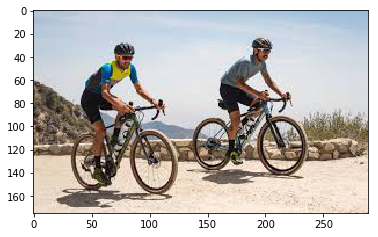

Predicted : BICYCLE (69.85%)


In [38]:
# decode the predictions
with open('./bin/class20.pickle', 'rb') as f:
    labels = pickle.load(f)
    
plt.imshow(load_img(fileName))
plt.show()    
print('Predicted : {} ({:.2f}%)'.format(labels[idx].upper(),res[0][idx]*100))



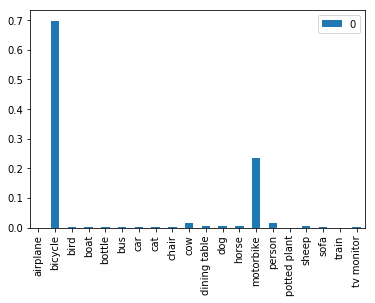

In [39]:
import pandas as pd
pd.DataFrame(res,columns=labels.values()).T.plot(kind='bar')
plt.show()

## Reference

- Intel
    - https://www.intel.co.kr/
- Intel OpenVINO
    - https://software.intel.com/en-us/openvino-toolkit
- MNIST
    - http://yann.lecun.com/exdb/mnist/
- CIFAR10
    - https://www.cs.toronto.edu/~kriz/cifar.html
- ImageNet
    - http://www.image-net.org
- Tensorflow
    - https://www.tensorflow.org/?hl=ko
- Keras
    - https://keras.io/
    - https://tensorflow.blog/2019/03/06/tensorflow-2-0-keras-api-overview/
    - https://tykimos.github.io/2017/02/22/Integrating_Keras_and_TensorFlow/
    - https://tykimos.github.io/2017/03/08/CNN_Getting_Started/
    - https://raw.githubusercontent.com/keras-team/keras-docs-ko/master/sources/why-use-keras.md
- Keras to Caffe
     - https://github.com/uhfband/keras2caffe
     - http://www.deepvisionconsulting.com/from-keras-to-caffe/
- Fully Connected Layer
    - https://sonofgodcom.wordpress.com/2018/12/31/cnn%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%B4%EB%B3%B4%EC%9E%90-fully-connected-layer%EB%8A%94-%EB%AD%94%EA%B0%80/
- Convultional Nueral Network
    - http://aikorea.org/cs231n/convolutional-networks/
    - http://cs231n.stanford.edu/
- CNN Models
    - https://ratsgo.github.io/deep%20learning/2017/10/09/CNNs/

- VOC2012
    - https://blog.godatadriven.com/rod-keras-multi-label
    - https://gist.github.com/rragundez/ae3a17428bfec631d1b35dcdc6296a85#file-multi-label_classification_with_keras_imagedatagenerator-ipynbhttps://fairyonice.github.io/Part_5_Object_Detection_with_Yolo_using_VOC_2012_data_training.html
    - http://research.sualab.com/introduction/2017/11/29/image-recognition-overview-1.html